**WHY SOM?**
According to the literature, SOM is a generic methodology, which has been applied in many classical modeling tasks such as **visualization** of a high dimensional space, **clustering and classification**, **prediction** and function approximation and many other tasks. 

There are different interpretations for SOM algorithm. 
One can compare SOM with other **clustering methods** or to compare it with space transformation and feature extraction methods such as Principal Component Analysis (PCA).


In [1]:
import pandas as pd
import numpy as np
from sompy import SOMFactory
import random
import joblib
import glob
import matplotlib.pyplot as plt
import matplotlib
from sompy.visualization.plot_tools import plot_hex_map

CACHEDIR=/Users/ccy/.matplotlib
Using fontManager instance from /Users/ccy/.matplotlib/fontlist-v330.json


# color data clustering

A little example with 3d color data

## Train a SOM with randomly generated colors, which are represented as 3d arrays

In [5]:
data = np.random.random([10000,3])

In [176]:
data[1]

array([0.15751547, 0.90582894, 0.33002924])

Website to check color scheme
https://convertingcolors.com/rgb-color-125_125_125.html?search=RGB(125,%20125,%20125)

In [177]:
data

array([[0.31670469, 0.19979342, 0.52404031],
       [0.15751547, 0.90582894, 0.33002924],
       [0.69811219, 0.46605457, 0.19277428],
       ...,
       [0.13420922, 0.54890521, 0.22703821],
       [0.38620188, 0.65237834, 0.98343126],
       [0.58384358, 0.16742606, 0.63496983]])

In [179]:
data.shape

(10000, 3)

In [183]:
data[0:9:1].reshape([3,3,3])

array([[[0.31670469, 0.19979342, 0.52404031],
        [0.15751547, 0.90582894, 0.33002924],
        [0.69811219, 0.46605457, 0.19277428]],

       [[0.00531555, 0.14034601, 0.56008252],
        [0.67266493, 0.78615779, 0.27019543],
        [0.44532817, 0.65907663, 0.67427891]],

       [[0.30730508, 0.97731497, 0.70403863],
        [0.35390536, 0.29299144, 0.40677638],
        [0.46388739, 0.4055057 , 0.11112754]]])

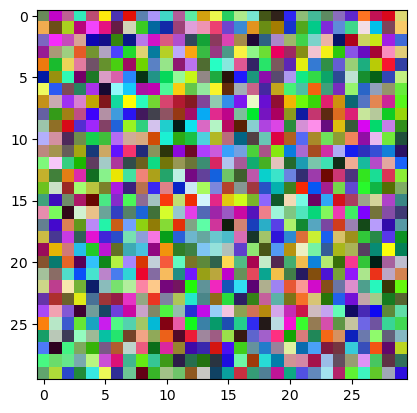

In [6]:
plt.imshow(np.asarray(random.sample(list(data),900)).reshape([30,30,3]))
plt.show()

## Train a 30x30 size SOM

Initialize a SOM

In [7]:
som = SOMFactory().build(data,mapsize=[30,30],normalization="var",initialization="random")

Train a SOM

In [8]:
som.train(n_job=3,verbose=False,train_rough_len=3,train_finetune_len=10)

## uncover the SOM matrix

In [9]:
matrix = som.codebook.matrix
matrix

array([[-0.699851, -0.433449, -1.393021],
       [-0.603836, -0.543048, -1.372048],
       [-0.477814, -0.705398, -1.34065 ],
       ...,
       [-0.90397 ,  1.487505, -0.202602],
       [-0.836377,  1.470711, -0.486236],
       [-0.763907,  1.453892, -0.686641]])

In [184]:
matrix.shape

(900, 3)

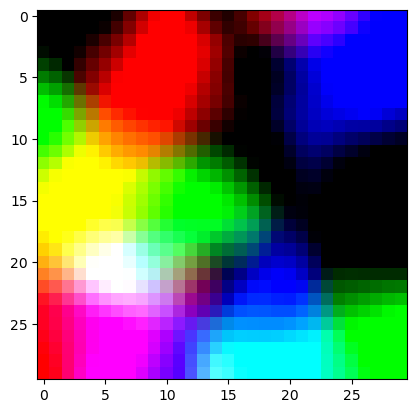

In [10]:
plt.imshow(matrix.reshape([30,30,3]))
plt.show()

<img src="visulized SOM.png" width="700" align="left"/>

## discover the BMUs for each data

In [14]:
som.project_data(data)

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([384, 837, 154, ..., 656, 767, 110])

In [15]:
indexes = som.project_data(data)
indexes[0:100:1]

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([384, 837, 154, 329, 399, 765, 894, 318,  92, 864, 890, 609,   1,
       472, 781, 883, 466, 769, 670, 315, 528, 444, 541, 431, 370, 236,
       217, 685, 801, 431, 299, 614, 885, 604, 635, 510, 847, 574, 639,
       123, 732, 676,  99, 370, 111, 582, 139, 791, 488, 249, 370, 479,
       603, 105,  30, 101, 778, 723, 200,  19, 613, 650,  42,  39, 312,
       270,  20, 852, 835, 468,  75, 817, 270,  51, 155, 602, 431, 628,
       238, 225, 351, 895, 545, 223, 161, 526, 585, 711, 403, 539, 864,
       761,  27, 359, 617, 174,  64, 505, 873, 515])

In [194]:
data[0]

array([0.31670469, 0.19979342, 0.52404031])

In [195]:
indexes[0]

384

## visulize where a data is assigned to the SOM

In [185]:
check = 1

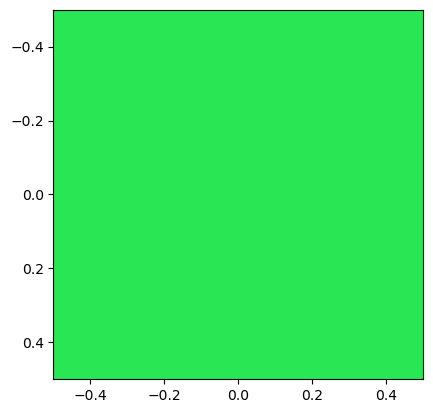

In [186]:
plt.imshow(data[check].reshape([1,1,3]))

<img src="colored som.png" width="400" align="left"/>

In [187]:
indexes[check]

837

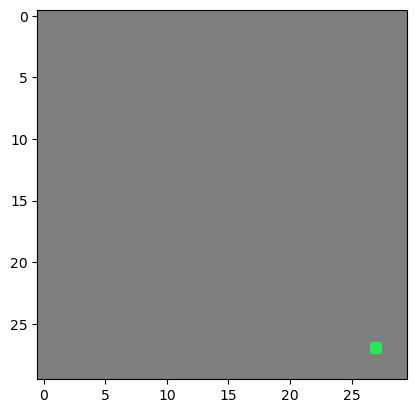

In [188]:
grids=[]
for i in range(900):
    grids.append([0.5,0.5,0.5])
grids[indexes[check]] = data[check]
plt.imshow(np.asarray(grids).reshape([30,30,3]))

## show the friends of colors which are aligned in the same BMU

In [189]:
units = []
for i in range(900):
    unit = []
    for j in range(len(indexes)):
        if indexes[j]==i:
            unit.append(data[j])
    units.append(unit)

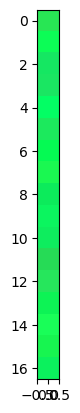

In [175]:
plt.imshow(np.asarray(units[837]).reshape([len(units[837]),1,3]))

Another example of a data - red color

In [190]:
check = 116

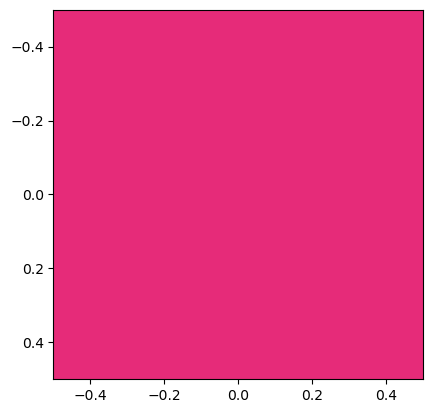

In [191]:
plt.imshow(data[check].reshape([1,1,3]))

<img src="colored som.png" width="400" align="left"/>

In [192]:
indexes[check]

840

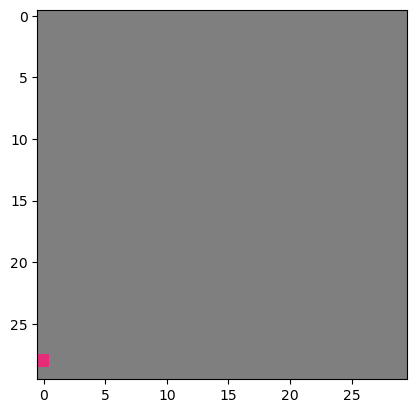

In [196]:
grids=[]
for i in range(900):
    grids.append([0.5,0.5,0.5])
grids[indexes[check]] = data[check]
plt.imshow(np.asarray(grids).reshape([30,30,3]))

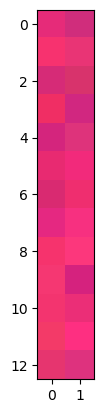

In [197]:
plt.imshow(np.asarray(units[indexes[check]]).reshape([int(len(units[indexes[check]])/2),2,3]))

# flight cancellation

analyze and visulize the potential relevance with cancellations

In [3]:
df = pd.read_csv("./DelayedFlights.csv")

In [4]:
df = df[["Month","DayofMonth", "DayOfWeek","DepTime", "AirTime",
         "Distance", "SecurityDelay","WeatherDelay", "NASDelay", "CarrierDelay",
         "ArrDelay", "DepDelay", "LateAircraftDelay", "Cancelled"]]

In [5]:
df = df.fillna(0)

In [6]:
clustering_vars = ["Month", "DayofMonth", "DepTime", "AirTime", 
                   "LateAircraftDelay", "DepDelay", "ArrDelay", "CarrierDelay"]

In [7]:
data = df[clustering_vars].values

In [8]:
names = clustering_vars

In [9]:
clustering_vars

['Month',
 'DayofMonth',
 'DepTime',
 'AirTime',
 'LateAircraftDelay',
 'DepDelay',
 'ArrDelay',
 'CarrierDelay']

In [10]:
df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,AirTime,Distance,SecurityDelay,WeatherDelay,NASDelay,CarrierDelay,ArrDelay,DepDelay,LateAircraftDelay,Cancelled
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.078083e+02,7.656862e+02,5.805836e-02,2.385512e+00,9.675607e+00,1.235367e+01,4.201714e+01,4.318518e+01,1.629374e+01,3.268348e-04
std,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,6.886184e+01,5.744797e+02,1.623934e+00,1.734036e+01,2.808958e+01,3.613493e+01,5.672935e+01,5.340250e+01,3.585904e+01,1.807562e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,5.800000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,9.000000e+01,6.060000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.400000e+01,0.000000e+00,0.000000e+00
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.370000e+02,9.980000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+01,5.500000e+01,5.300000e+01,1.800000e+01,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,1.091000e+03,4.962000e+03,3.920000e+02,1.352000e+03,1.357000e+03,2.436000e+03,2.461000e+03,2.467000e+03,1.316000e+03,1.000000e+00


SOMPY https://github.com/sevamoo/SOMPY

In [11]:
som = SOMFactory().build(data, mapsize=[10,10],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa")

In [12]:
som.train(n_job=4, verbose=False, train_rough_len=3, train_finetune_len=10)

KeyboardInterrupt: 

In [42]:
%%time
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study
for i in range(2):
    som = SOMFactory().build(data, mapsize=[20,20],
                            normalization = 'var', initialization='random', component_names=names,lattice="hexa")
    som.train(n_job=4, verbose=False, train_rough_len=3, train_finetune_len=10)
    joblib.dump(som, "./models/model_{}.joblib".format(i))

CPU times: user 6min 54s, sys: 8min 24s, total: 15min 19s
Wall time: 2min 37s


In [13]:
models_pool = glob.glob("./models/model*")
errors=[]
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
e_top, e_q = zip(*errors)

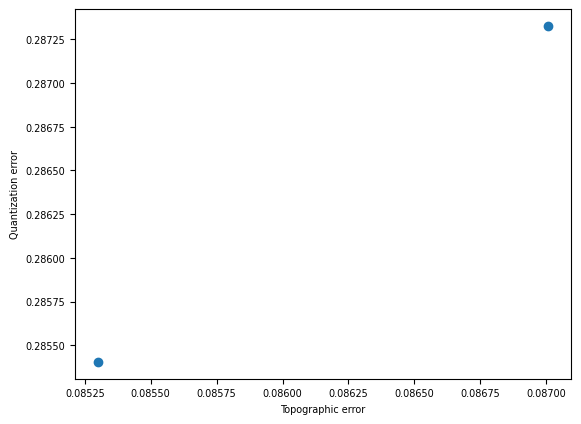

In [43]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [44]:
selected_model = 1
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.15118512483232288
 Quantization error = 0.3417101184666735


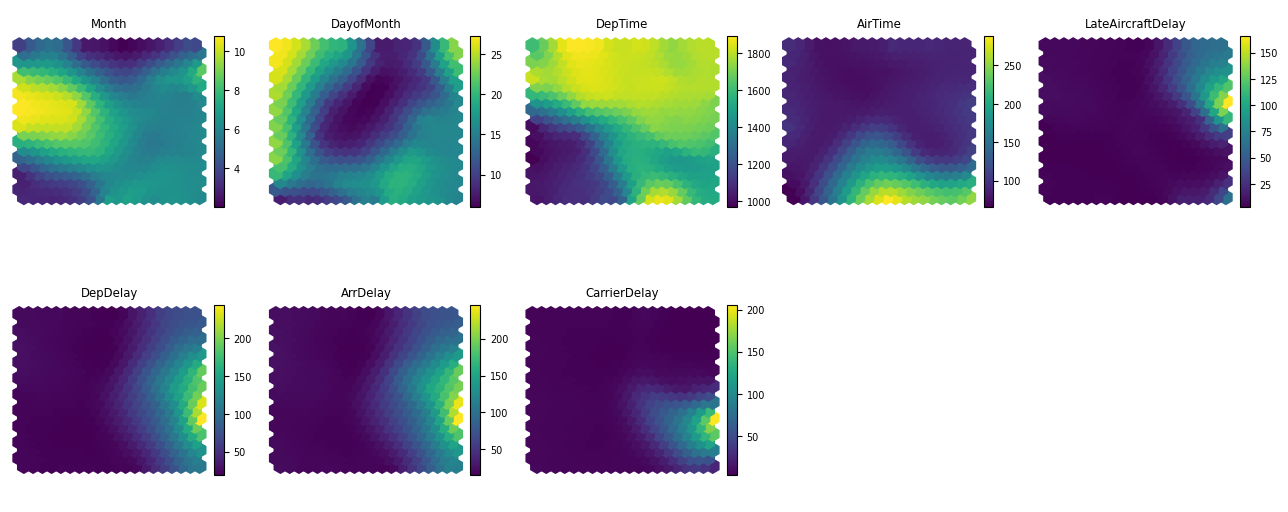

In [45]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

In [46]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'AirTime', 'Distance',
       'SecurityDelay', 'WeatherDelay', 'NASDelay', 'CarrierDelay', 'ArrDelay',
       'DepDelay', 'LateAircraftDelay', 'Cancelled', 'bmus'],
      dtype='object')

In [47]:
# Addition of some exogeneous variables to the map
exogeneous_vars = [c for c in df.columns if not c in clustering_vars+["Cancelled", "bmus"]] 

In [48]:
df["bmus"] = sm.project_data(data)
df.shape

/Users/ccy/opt/anaconda3/envs/som/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
empirical_codebook.shape

(400, 14)

In [51]:
df = df[clustering_vars + exogeneous_vars + ["Cancelled"] + ["bmus"]]

In [52]:
empirical_codebook=df.groupby("bmus").mean().values

In [38]:
sm.codebook.mapsize + [empirical_codebook.shape[-1]]

[20, 20, 14]

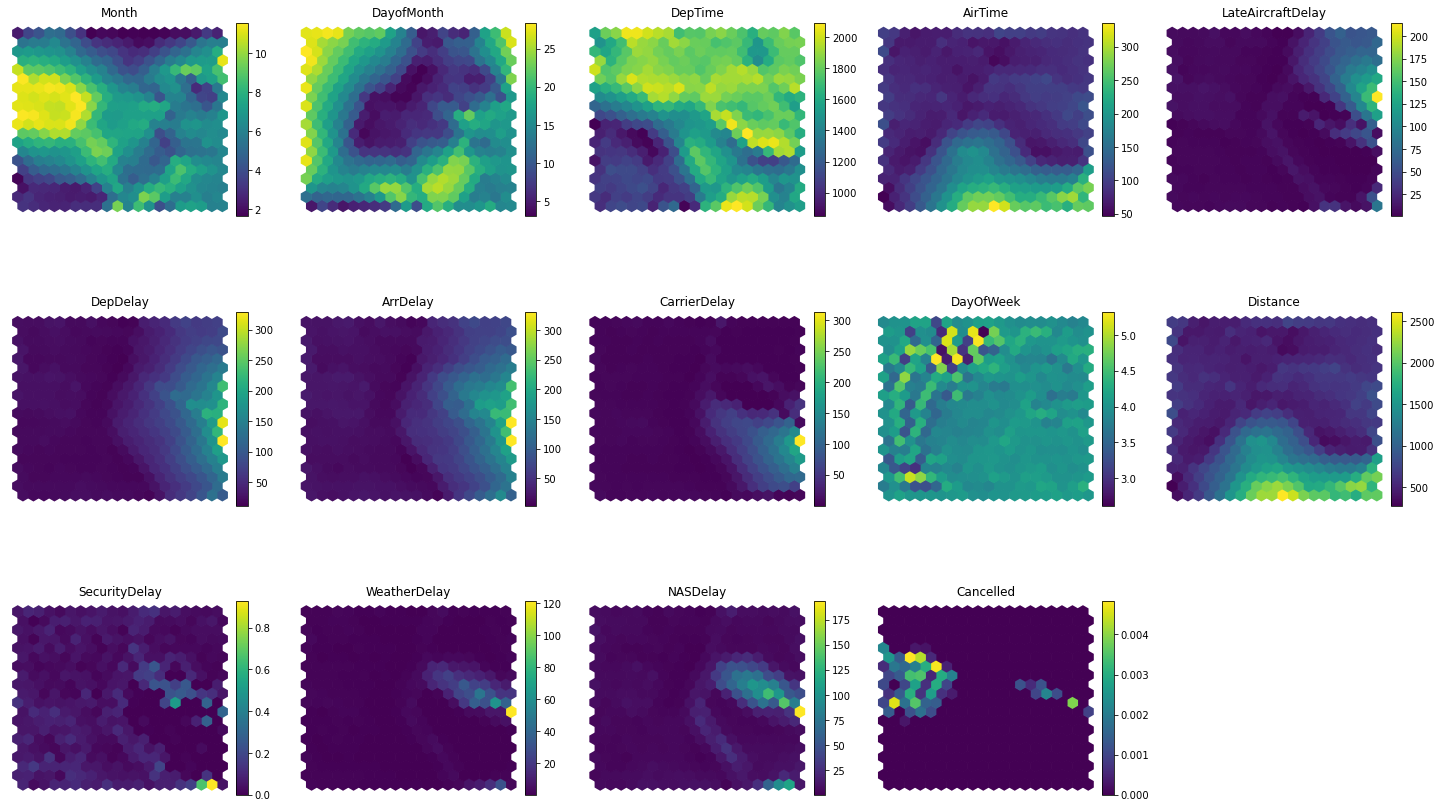

In [53]:
matplotlib.rcParams.update({'font.size': 10})
plot_hex_map(empirical_codebook.reshape(sm.codebook.mapsize + [empirical_codebook.shape[-1]]), 
             titles=df.columns[:-1], shape=[4, 5], colormap=None)
plt.show()

Conclusion:

* cancellation is related to Month. Late months are more likely to have cancelled flight

* ....

Couple of things to confirm:

* Normalization?

* optimization radius

* Saving models choose models according to error? Do we talk about quantization error and topological error?


small syntax:
numpy.reshape; 
dataframe slices; 
dataframe groupby

Applications in architecture